In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

In [3]:
data = pd.read_csv('santander-train.csv', nrows = 20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
X = data.drop('TARGET', axis = 1)
y = data['TARGET']
X.shape, y.shape

((20000, 370), (20000,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X , y,test_size = 0.2, random_state = 0, stratify = y)

# Constant Features Removal

In [6]:

constant_fiter = VarianceThreshold(threshold=0)
constant_fiter.fit(X_train)

VarianceThreshold(threshold=0)

In [7]:
constant_fiter.get_support().sum()

291

In [8]:
constant_list = [not temp for temp in constant_fiter.get_support()]
constant_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fa

In [9]:
X.columns[constant_list]

Index(['ind_var2_0', 'ind_var2', 'ind_var13_medio_0', 'ind_var13_medio',
       'ind_var18_0', 'ind_var18', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var34_0', 'ind_var34', 'ind_var41', 'ind_var46_0',
       'ind_var46', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0',
       'num_var18', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27',
       'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0', 'num_var46',
       'saldo_var13_medio', 'saldo_var18', 'saldo_var28', 'saldo_var27',
       'saldo_var34', 'saldo_var41', 'saldo_var46',
       'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3',
       'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3',
       'delta_imp_trasp_var33_out_1y3', 'delta_num_reemb_var33_1y3',
       'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_out_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var18_ult1',
       'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_var7_emit_ult1',
       'imp

In [10]:
X_train_filter = constant_fiter.transform(X_train)
X_test_filter = constant_fiter.transform(X_test)

In [11]:
X_train_filter.shape, X_test_filter.shape, X_train.shape

((16000, 291), (4000, 291), (16000, 370))

# Quasi Constant Feature Removal

In [12]:
quasi_constant_filter = VarianceThreshold(threshold=0.1)

In [13]:
quasi_constant_filter.fit(X_train_filter)

VarianceThreshold(threshold=0.1)

In [14]:
quasi_constant_filter.get_support().sum()

194

In [15]:
X_train_quasi_filter = quasi_constant_filter.transform(X_train_filter)
X_test_quasi_filter = quasi_constant_filter.transform(X_test_filter)

In [16]:
X_train_quasi_filter.shape, X_test_quasi_filter.shape

((16000, 194), (4000, 194))

# Remove duplicate feature

In [17]:
X_train_T = X_train_quasi_filter.T
X_test_T = X_test_quasi_filter.T

In [18]:
type(X_train_T)

numpy.ndarray

In [19]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [20]:
X_train_T.shape, X_test_T.shape

((194, 16000), (194, 4000))

In [21]:
X_train_T.duplicated().sum()

11

In [22]:
duplicated_features = X_train_T.duplicated()
duplicated_features

0      False
1      False
2      False
3      False
4      False
       ...  
189    False
190    False
191    False
192    False
193    False
Length: 194, dtype: bool

In [23]:
features_to_keep = [not index for index in duplicated_features]

In [24]:
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [25]:
X_train_unique.shape, X_train.shape 

((16000, 183), (16000, 370))

# Build ML model to compare the performance of selected feature

In [26]:
def run_randomforest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Acc on test set")
    print(accuracy_score(y_test, y_pred))

In [27]:
%%time
run_randomforest(X_train_unique, X_test_unique, y_train, y_test)

Acc on test set
0.958
CPU times: user 5.8 s, sys: 129 ms, total: 5.93 s
Wall time: 1.2 s


In [28]:
%%time
run_randomforest(X_train, X_test, y_train, y_test)

Acc on test set
0.9585
CPU times: user 8.54 s, sys: 171 ms, total: 8.71 s
Wall time: 1.55 s


In [29]:
(1.55-1.01)*100/1.55

34.83870967741935

# Correlated Feature Removal

In [31]:
corrmat = X_train_unique.corr()

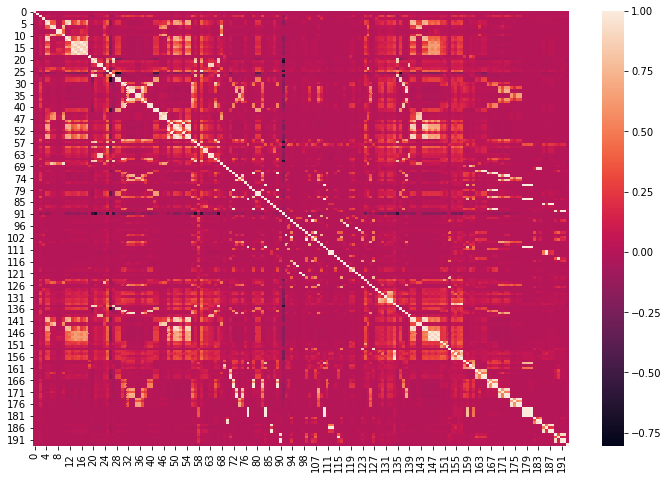

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(corrmat)

In [33]:
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j] > threshold):
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [35]:
cor_features = get_correlation(X_train_unique, 0.85)
cor_features

{5,
 7,
 9,
 11,
 12,
 14,
 15,
 16,
 17,
 18,
 23,
 27,
 29,
 34,
 36,
 37,
 39,
 40,
 43,
 47,
 51,
 52,
 53,
 54,
 55,
 57,
 59,
 61,
 63,
 65,
 66,
 67,
 68,
 75,
 79,
 81,
 84,
 89,
 100,
 102,
 107,
 110,
 113,
 117,
 118,
 121,
 122,
 133,
 135,
 136,
 137,
 138,
 140,
 141,
 142,
 143,
 144,
 145,
 147,
 148,
 149,
 153,
 154,
 156,
 157,
 164,
 165,
 166,
 168,
 169,
 170,
 172,
 173,
 176,
 177,
 178,
 179,
 180,
 181,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192}

In [36]:
len(cor_features)

89

In [37]:
X_train_uncorr = X_train_unique.drop(labels=cor_features, axis=1)
X_test_uncorr = X_test_unique.drop(labels=cor_features, axis=1)

In [38]:
X_train_uncorr.shape, X_test_uncorr.shape

((16000, 94), (4000, 94))

In [39]:
%%time 
run_randomforest(X_train_uncorr, X_test_uncorr, y_train, y_test)

Acc on test set
0.95825
CPU times: user 3.75 s, sys: 109 ms, total: 3.86 s
Wall time: 869 ms


In [40]:
%%time 
run_randomforest(X_train, X_test, y_train, y_test)

Acc on test set
0.9585
CPU times: user 9.34 s, sys: 188 ms, total: 9.53 s
Wall time: 1.76 s


In [41]:
(1.76 - 0.869)*100/1.76

50.625

# Feature Grouping and Feature Importance


In [57]:
corrmat

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
0,1.000000,-0.025277,-0.001942,0.003594,0.004054,-0.001697,-0.015882,-0.019807,0.000956,-0.000588,...,-0.001337,0.002051,-0.008500,0.006554,0.005907,0.008825,-0.009174,0.012031,0.012128,0.006612
1,-0.025277,1.000000,-0.007647,0.001819,0.008981,0.009232,0.001638,0.001746,0.000614,0.000695,...,0.000544,0.000586,0.000337,0.000550,0.000563,0.000922,0.000598,0.000875,0.000942,0.000415
2,-0.001942,-0.007647,1.000000,0.030919,0.106245,0.109140,0.048524,0.055708,0.004040,0.005796,...,0.025522,0.020168,0.011550,0.019325,0.019527,0.041321,0.016172,0.043577,0.044281,-0.000810
3,0.003594,0.001819,0.030919,1.000000,0.029418,0.024905,0.014513,0.013857,-0.000613,-0.000691,...,0.014032,-0.000583,-0.000337,-0.000548,-0.000561,0.000541,-0.000577,0.000231,0.000235,0.000966
4,0.004054,0.008981,0.106245,0.029418,1.000000,0.888789,0.381632,0.341266,0.012927,0.019674,...,0.002328,0.016743,-0.001662,0.020509,0.021276,-0.001905,-0.000635,-0.002552,-0.002736,0.003656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0.008825,0.000922,0.041321,0.000541,-0.001905,0.000871,-0.000818,-0.000866,-0.000309,-0.000349,...,0.012705,0.021540,-0.000170,0.032162,0.030087,1.000000,0.329805,0.935317,0.919036,0.011106
190,-0.009174,0.000598,0.016172,-0.000577,-0.000635,0.007096,-0.000515,-0.000545,-0.000195,-0.000220,...,-0.000173,-0.000185,-0.000107,-0.000174,-0.000178,0.329805,1.000000,0.127224,0.140902,0.011807
191,0.012031,0.000875,0.043577,0.000231,-0.002552,-0.001672,-0.000779,-0.000825,-0.000295,-0.000332,...,0.027515,0.012393,-0.000162,0.018565,0.017358,0.935317,0.127224,1.000000,0.993536,0.008604
192,0.012128,0.000942,0.044281,0.000235,-0.002736,-0.001844,-0.000839,-0.000888,-0.000317,-0.000358,...,0.023072,0.014523,-0.000174,0.021742,0.020331,0.919036,0.140902,0.993536,1.000000,0.009136


In [58]:
cordata = corrmat.abs().stack()
cordata

0    0      1.000000
     1      0.025277
     2      0.001942
     3      0.003594
     4      0.004054
              ...   
193  189    0.011106
     190    0.011807
     191    0.008604
     192    0.009136
     193    1.000000
Length: 33489, dtype: float64

In [59]:
cordata = cordata.sort_values(ascending=False)
cordata

98   122    1.000000e+00
122  98     1.000000e+00
193  193    1.000000e+00
133  133    1.000000e+00
125  125    1.000000e+00
                ...     
178  75     1.934954e-06
114  180    6.044672e-07
180  114    6.044672e-07
     87     3.966696e-07
87   180    3.966696e-07
Length: 33489, dtype: float64

In [60]:
cordata = cordata[cordata >0.85]
cordata = cordata[cordata < 1]
cordata

107  99     1.000000
99   107    1.000000
92   100    1.000000
100  92     1.000000
121  97     1.000000
              ...   
141  54     0.858484
144  55     0.857731
55   144    0.857731
142  47     0.857717
47   142    0.857717
Length: 350, dtype: float64

In [61]:
cordata = pd.DataFrame(cordata).reset_index()
cordata.columns = ['feature1', 'feature2', 'Corr_Value']
cordata

,feature1,feature2,Corr_Value
0,107,99,1.000000
1,99,107,1.000000
2,92,100,1.000000
3,100,92,1.000000
4,121,97,1.000000
...,...,...,...
345,141,54,0.858484
346,144,55,0.857731
347,55,144,0.857731
348,142,47,0.857717


In [62]:
grouped_feature_list = []
correlated_groups_list = []
for feature in cordata.feature1.unique():
    if feature not in grouped_feature_list:
        correlated_block = cordata[cordata.feature1 == feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.feature2.unique()) + [feature]
        correlated_groups_list.append(correlated_block)
        

In [63]:
len(correlated_groups_list)

46

In [64]:
X_train.shape, X_train_uncorr.shape

((16000, 370), (16000, 94))

In [65]:
for group in correlated_groups_list:
    print(group)

   feature1  feature2  Corr_Value
0       107        99         1.0
   feature1  feature2  Corr_Value
2        92       100         1.0
   feature1  feature2  Corr_Value
4       121        97         1.0
    feature1  feature2  Corr_Value
6        186       113    1.000000
16       186       112    0.999929
   feature1  feature2  Corr_Value
8        96       118         1.0
    feature1  feature2  Corr_Value
10       110       179    0.999997
27       110       178    0.999778
46       110       180    0.997052
56       110       181    0.996772
65       110        77    0.996424
74       110        84    0.993307
     feature1  feature2  Corr_Value
12         86       187    0.999945
32         86       188    0.998991
183        86       185    0.941404
    feature1  feature2  Corr_Value
24        53        49    0.999859
     feature1  feature2  Corr_Value
30         72        79    0.999478
81         72       168    0.992870
97         72        89    0.987333
116        72       

# Feature importance based on tree based classifers

In [69]:
important_features = []
for group in correlated_groups_list:
    features = list(group.feature1.unique()) + list(group.feature2.unique())
    rf = RandomForestClassifier(n_estimators=100, random_state=0)
    rf.fit(X_train_unique[features], y_train)
    
    importance = pd.concat([pd.Series(features), pd.Series(rf.feature_importances_)], axis=1)
    importance.columns = ['features', 'importance']
    importance.sort_values(by='importance', ascending = False, inplace = True)
    feat = importance.iloc[0]
    important_features.append(feat)
                
    
                    
    
    

In [70]:
important_features

[features      99.00
 importance     0.51
 Name: 1, dtype: float64,
 features      100.000000
 importance      0.506959
 Name: 1, dtype: float64,
 features      121.000000
 importance      0.523077
 Name: 0, dtype: float64,
 features      112.000000
 importance      0.624498
 Name: 2, dtype: float64,
 features      118.000000
 importance      0.565217
 Name: 1, dtype: float64,
 features      84.000000
 importance     0.750233
 Name: 6, dtype: float64,
 features      187.000000
 importance      0.343434
 Name: 1, dtype: float64,
 features      53.000000
 importance     0.518827
 Name: 0, dtype: float64,
 features      89.000000
 importance     0.940524
 Name: 3, dtype: float64,
 features      147.000000
 importance      0.287753
 Name: 0, dtype: float64,
 features      156.000000
 importance      0.312834
 Name: 3, dtype: float64,
 features      17.000000
 importance     0.286833
 Name: 0, dtype: float64,
 features      192.000000
 importance      0.431557
 Name: 1, dtype: float64,
 fea

In [71]:
important_features = pd.DataFrame(important_features)

In [72]:
important_features.reset_index(inplace=True, drop=True)

In [73]:
important_features

,features,importance
0,99.0,0.510000
1,100.0,0.506959
2,121.0,0.523077
3,112.0,0.624498
4,118.0,0.565217
5,84.0,0.750233
6,187.0,0.343434
7,53.0,0.518827
8,89.0,0.940524
9,147.0,0.287753


In [74]:
features_to_consider = set(important_features['features'])

In [75]:
features_to_discard = set(cor_features) - set(features_to_consider)

In [76]:
features_to_discard = list(features_to_discard)

In [78]:
X_train_grouped_uncorr = X_train_unique.drop(labels=features_to_discard, axis = 1)
X_train_grouped_uncorr.shape

(16000, 127)

In [79]:
X_test_grouped_uncorr = X_test_unique.drop(labels=features_to_discard, axis = 1)
X_test_grouped_uncorr.shape

(4000, 127)

In [80]:
%%time
run_randomforest(X_train_grouped_uncorr, X_test_grouped_uncorr, y_train, y_test)

Acc on test set
0.95725
CPU times: user 4.57 s, sys: 120 ms, total: 4.69 s
Wall time: 983 ms


In [81]:
%%time
run_randomforest(X_train_uncorr, X_test_uncorr, y_train, y_test)

Acc on test set
0.95825
CPU times: user 3.75 s, sys: 96.8 ms, total: 3.85 s
Wall time: 879 ms


In [82]:
%%time
run_randomforest(X_train, X_test, y_train, y_test)

Acc on test set
0.9585
CPU times: user 8.83 s, sys: 183 ms, total: 9.02 s
Wall time: 1.78 s
